<a href="https://colab.research.google.com/github/PollySaa/Labs_mashin/blob/main/laba_mashin_4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Площадь под графиком и управление порогом**

Выполнила: Смирнова П.М.

Группа: БИВТ-22-СП-4

**Цель работы**

Научиться применять кривые PR и ROC для оценки моделей классификации, использовать их для выбора оптимального порога классификации.

**Содержание работы**

1. Сгенерируйте датасет для бинарной классификации, обучите на нем модель логистической регрессии и постройте для этой модели кривые ROC и PR.
2. Вычислите для этой модели метрики площади под кривыми (ROC-AUC и PR-AUC).
3. Обучите на том же датасете другую модель и сравните ее эффективность по кривым и по метрикам.
4. Сгенерируйте датасет для бинарной классификации с большим дисбалансом классов, обучите на нам ту же модель и постройте кривые.
5. Используйте данные, вычисленные для построения кривых для нахождения оптимального значения порога модели. Постройте матрицу классификации для модели с порогом по умолчанию и с лучшим порогом. Сравните результаты.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from numpy.random import shuffle
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc, roc_auc_score, precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from numpy import argmax

In [ ]:
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)

In [ ]:
model = LogisticRegression().fit(X_train, y_train)

In [ ]:
y_pred_proba = model.predict_proba(X_test)

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])

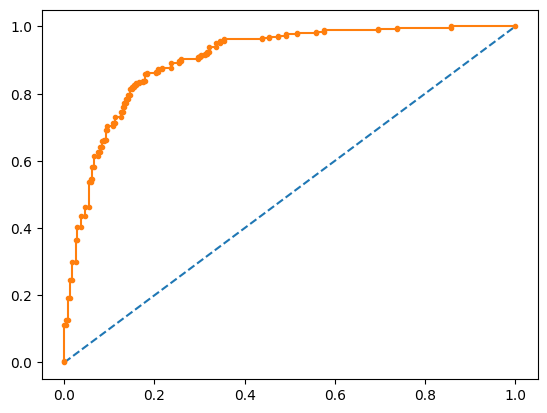

In [ ]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

**Вывод:** из графика мы видим, что кривая находится выше прямой, что свидетельствует о том, что классификатор работает лучше, чем случайное предсказание. Но можно заметить, что при разных значениях порога (зеленые точки на графике) модель имеет значительно различающиеся характеристики. И только одна точка на этом графике характеризует поведение модели при "дефолтном" значении порога - то, что мы обычно не задумываясь получаем методом predict.

In [ ]:
roc_auc_score(y_test, y_pred_proba[:, 1])

np.float64(0.9027724358974359)

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])

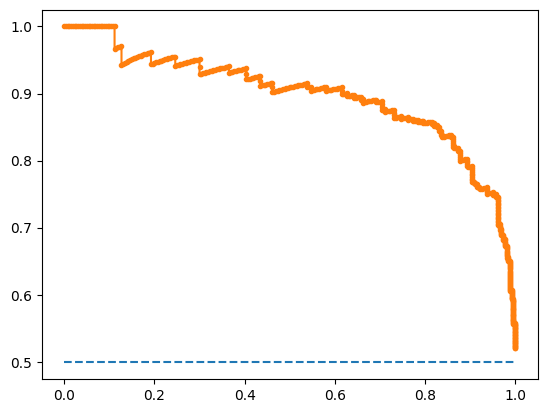

In [ ]:
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')

plt.plot(recall, precision, marker='.')
plt.show()

In [ ]:
auc(recall, precision)

np.float64(0.897662372903334)

In [ ]:
y_test_pred = model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       240
           1       0.84      0.85      0.84       260

    accuracy                           0.83       500
   macro avg       0.83      0.83      0.83       500
weighted avg       0.83      0.83      0.83       500



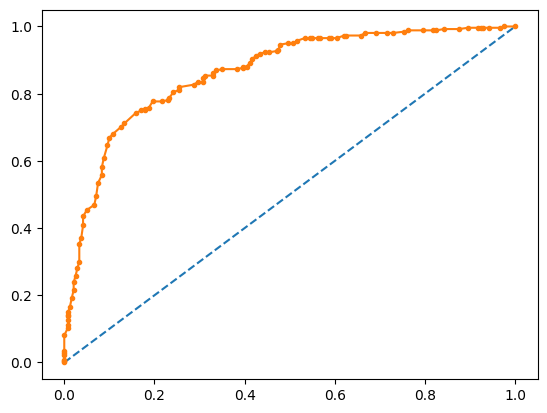

In [ ]:
model2 = KNeighborsClassifier(n_neighbors=250).fit(X_train, y_train)
y_pred2_proba = model2.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred2_proba[:, 1])

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred2_proba[:, 1])

np.float64(0.8630608974358974)

**Дизбаланс классов**

In [ ]:
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99, 0.01], random_state=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=4)

print('Датасет: Class0=%d, Class1=%d' % (len(y[y==0]), len(y[y==1])))
print('Обучающая: Class0=%d, Class1=%d' % (len(y_train[y_train==0]), len(y_train[y_train==1])))
print('Тестовая: Class0=%d, Class1=%d' % (len(y_test[y_test==0]), len(y_test[y_test==1])))

Датасет: Class0=985, Class1=15
Обучающая: Class0=490, Class1=10
Тестовая: Class0=495, Class1=5


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)

In [ ]:
model = LogisticRegression().fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

In [ ]:
y_test_pred = model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       492
           1       0.00      0.00      0.00         8

    accuracy                           0.98       500
   macro avg       0.49      0.50      0.50       500
weighted avg       0.97      0.98      0.98       500



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


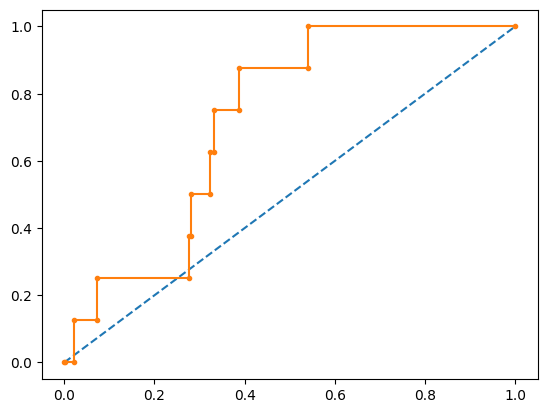

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

**Вывод:** мы видим. что вривая показывает не идеальное, но вполне примелемое поведение модели. Средняя точность будет, несомненно, ниже, чем в первом примере работы, но ничего катастрофического мы здесь не наблюдаем.

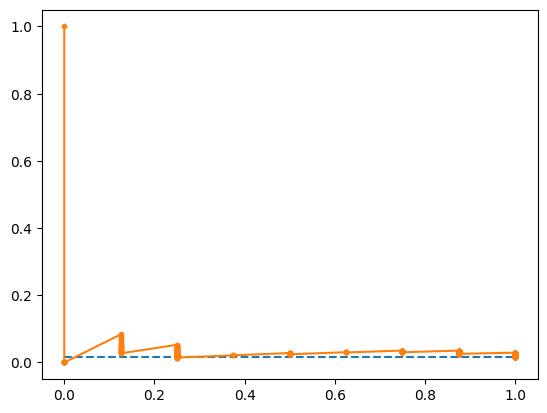

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.show()

**Вывод:** на этом графике уже открывается истинное поведение модели: она не очень-то отличается от тривиальной, просто чаще предсказывает самый распространенный класс. Так как метрики Precision и Recall специально были созданы для случая несбалансированных классов, именно PR-кривая дает более реалистические оценки эффективности работы моделей классификации на таких данных, где наблюдается большой дисбаланс классов.

**Выбор значения порога по кривым**

In [ ]:
X, y = make_classification(n_samples=10000, n_classes=2, weights=[0.99, 0.01], random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)

model = LogisticRegression().fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

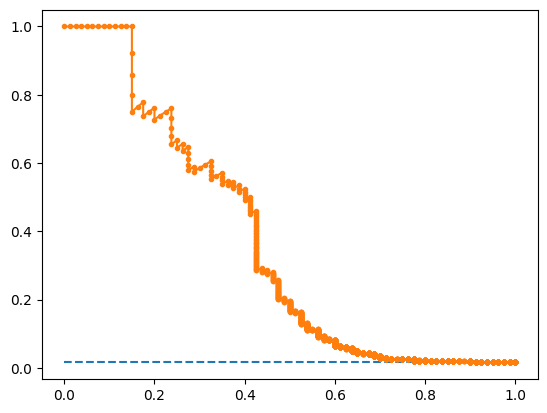

In [ ]:
p, r, pr_thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(r, p, marker='.')
plt.show()

In [ ]:
f1 = (2 * p * r) / (p + r)
ix = argmax(f1)
pr_thresholds[ix]

np.float64(0.15544215305172523)

In [ ]:
print('Порог=%f, F-Score=%.3f' % (pr_thresholds[ix], f1[ix]))

Порог=0.155442, F-Score=0.454


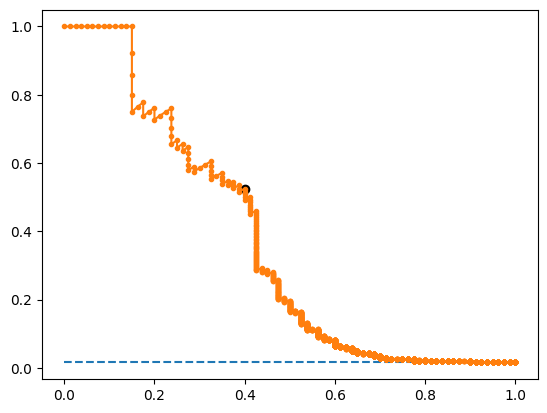

In [ ]:
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(r, p, marker='.')
plt.scatter(r[ix], p[ix], marker='o', color='black')
plt.show()

In [ ]:
y_pred = (y_pred_proba[:, 1] > pr_thresholds[ix]).astype('int')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4920
           1       0.52      0.39      0.44        80

    accuracy                           0.98      5000
   macro avg       0.75      0.69      0.72      5000
weighted avg       0.98      0.98      0.98      5000



In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4920
           1       1.00      0.14      0.24        80

    accuracy                           0.99      5000
   macro avg       0.99      0.57      0.62      5000
weighted avg       0.99      0.99      0.98      5000



# **Задания для самостоятельного выполнения**

1. Повторите анализ из лабораторной работы, но с двумерными датасетами. Изобразите графически, как изменение порога влияет на расположение границы принятия решений.
2. Повторите анализ на реальном датасете для бинарной классификации. Проинтерпретируйте результат, сделайте вывод.
3. В задании по оптимизации порога используйте ROC и среднее геометрическое между TPR и FPR как критерий оптимизации.
4. При оптимизации порога по PR-кривой используйте другую F-метрику - сначала с преимуществом precision, а затем - с превалированием recall. Изобразите получившиеся пороги на графике. Проанализируйте метрики получившихся моделей.
5. Постройте классификационные кривые для задачи множественной классификации. Проинтерпретируйте результат.
6. Используйте для построения кривых библиотеку yellowbrick.

**1. Анализ с двумерными датасетами и влияние порога на границу решений**

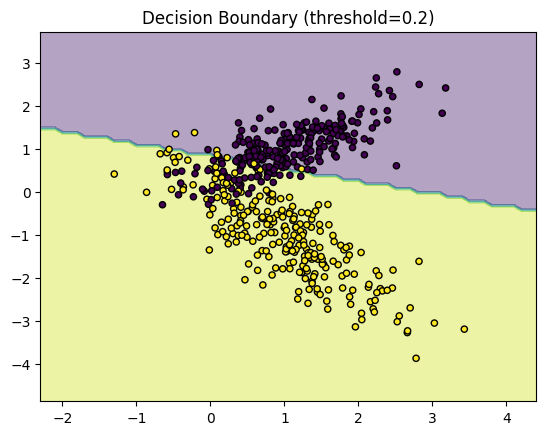

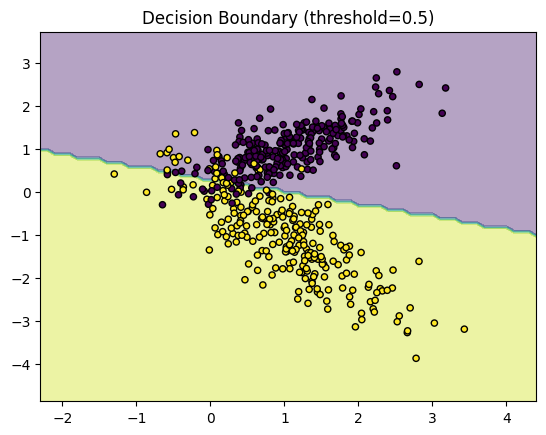

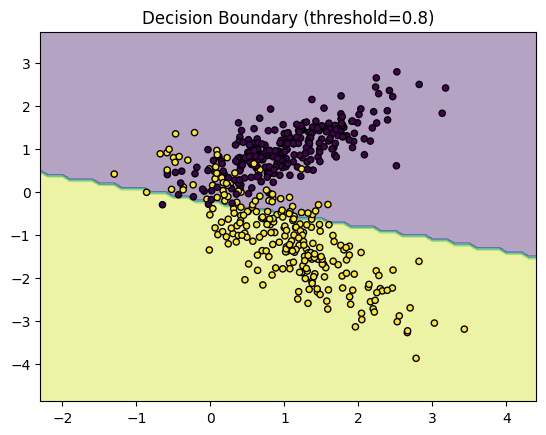

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=1000, n_features=2, n_classes=2,
                           n_redundant=0, n_clusters_per_class=1, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)

model = LogisticRegression().fit(X_train, y_train)

def plot_decision_boundary(model, X, y, threshold=0.5, title='Decision Boundary'):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = (Z > threshold).astype(int)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    plt.title(f'{title} (threshold={threshold})')
    plt.show()

thresholds = [0.2, 0.5, 0.8]
for thresh in thresholds:
    plot_decision_boundary(model, X_test, y_test, threshold=thresh)

**Общий вывод:**

Изменение порога существенно влияет на положение границы решений и поведение классификатора. Выбор оптимального порога должен основываться на:

Балансе классов в данных

Бизнес-требованиях (что важнее: минимизация ложных срабатываний или максимизация обнаружения)

Метриках качества (F1-score, precision-recall и др.)

**2. Анализ на реальном датасете для бинарной классификации**

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import classification_report, roc_auc_score

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=10000).fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

ROC-AUC: 0.9976


**Вывод:** модель хорошо справляется с классификацией (высокий precision и recall для класса 1) ROC-AUC близок к 1, что указывает на отличное качество модели.

**3. Оптимизация порога по ROC и среднему геометрическому**

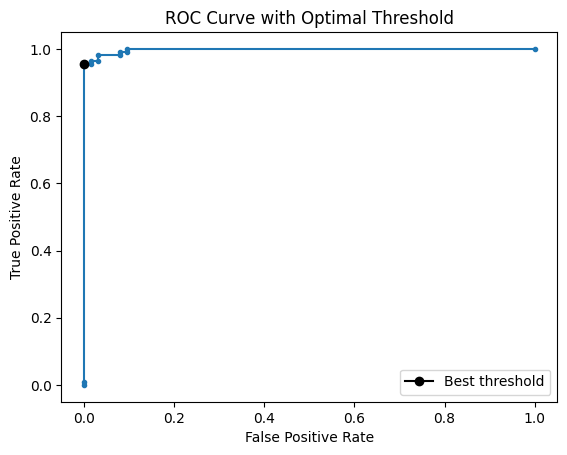

Optimal Threshold: 0.802, G-Mean: 0.977
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        63
           1       1.00      0.95      0.98       108

    accuracy                           0.97       171
   macro avg       0.96      0.98      0.97       171
weighted avg       0.97      0.97      0.97       171



In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)

plt.plot(fpr, tpr, marker='.')
plt.plot(fpr[ix], tpr[ix], marker='o', color='black', label='Best threshold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Optimal Threshold')
plt.legend()
plt.show()

optimal_threshold = thresholds[ix]
print(f'Optimal Threshold: {optimal_threshold:.3f}, G-Mean: {gmeans[ix]:.3f}')

y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)
print(classification_report(y_test, y_pred_optimal))

**Вывод:**

Оптимизация порога по G-Mean эффективна для сбалансированных данных.

Выбранный порог 0.8 обеспечивает почти максимальную точность и полноту, что подтверждается ROC-кривой (точка близка к левому верхнему углу).

**4. Оптимизация порога по PR-кривой с разными F-метриками**

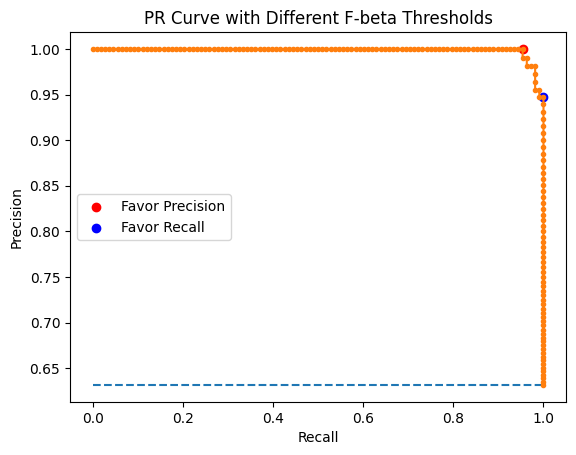

Favoring Precision:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        63
           1       1.00      0.95      0.98       108

    accuracy                           0.97       171
   macro avg       0.96      0.98      0.97       171
weighted avg       0.97      0.97      0.97       171


Favoring Recall:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        63
           1       0.95      1.00      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.97      0.96      0.96       171



In [ ]:
from sklearn.metrics import precision_recall_curve, f1_score

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
no_skill = len(y_test[y_test==1]) / len(y_test)

f_beta_precision = (1 + 0.5**2) * (precision * recall) / (0.5**2 * precision + recall)
ix_precision = np.argmax(f_beta_precision[:-1])

f_beta_recall = (1 + 2**2) * (precision * recall) / (2**2 * precision + recall)
ix_recall = np.argmax(f_beta_recall[:-1])

plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.scatter(recall[ix_precision], precision[ix_precision], marker='o', color='red', label='Favor Precision')
plt.scatter(recall[ix_recall], precision[ix_recall], marker='o', color='blue', label='Favor Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR Curve with Different F-beta Thresholds')
plt.legend()
plt.show()

y_pred_precision = (y_pred_proba >= thresholds[ix_precision]).astype(int)
y_pred_recall = (y_pred_proba >= thresholds[ix_recall]).astype(int)

print("Favoring Precision:")
print(classification_report(y_test, y_pred_precision))
print("\nFavoring Recall:")
print(classification_report(y_test, y_pred_recall))

**5. Классификационные кривые для множественной классификации**

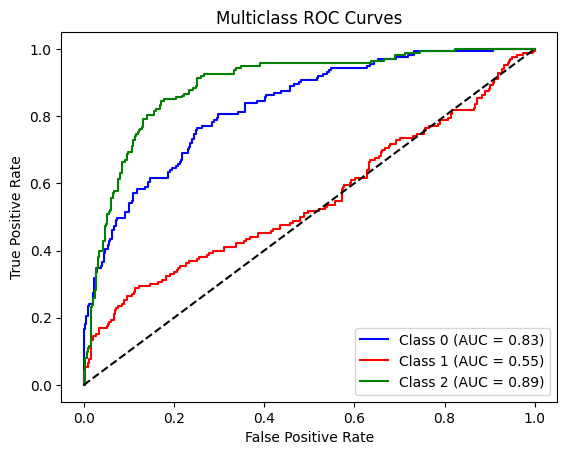

In [ ]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc

X, y = make_classification(n_samples=1000, n_classes=3, n_features=20, n_informative=3, random_state=42)
y = label_binarize(y, classes=[0, 1, 2])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

model = OneVsRestClassifier(LogisticRegression(max_iter=1000)).fit(X_train, y_train)
y_score = model.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curves')
plt.legend()
plt.show()

**Вывод:** модель требует доработки для Class 1, но применима для задач, где критичны Class 0 и Class 2. Для Class 1 стоит рассмотреть альтернативные подходы.

**6. Использование библиотеки yellowbrick**

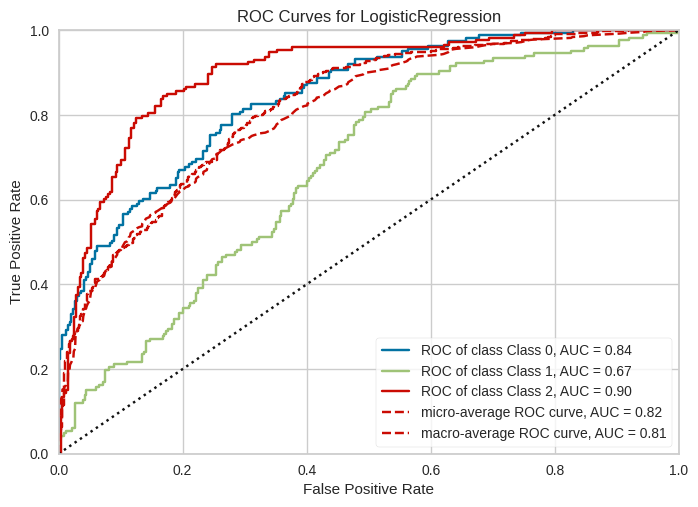

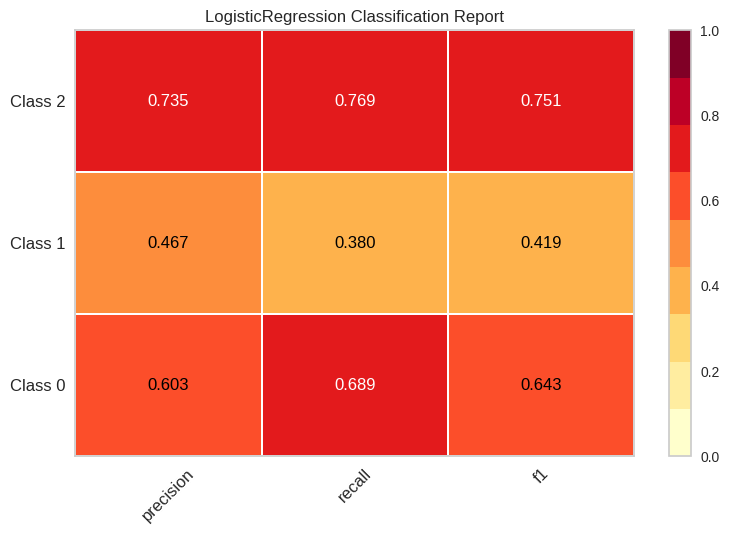

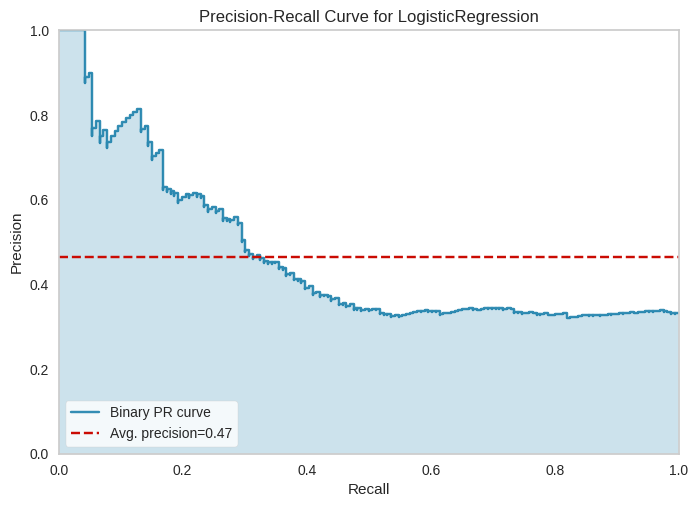

<Axes: title={'center': 'Precision-Recall Curve for LogisticRegression'}, xlabel='Recall', ylabel='Precision'>

In [ ]:
from yellowbrick.classifier import ROCAUC, PrecisionRecallCurve, ClassificationReport
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np

X, y = make_classification(n_samples=1000, n_classes=3, n_features=20,
                          n_informative=3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

model = LogisticRegression(max_iter=1000).fit(X_train, y_train)

# 1. ROC-AUC кривая (для многоклассового случая)
visualizer = ROCAUC(model, classes=["Class 0", "Class 1", "Class 2"])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

# 2. Classification Report
visualizer = ClassificationReport(model, classes=["Class 0", "Class 1", "Class 2"])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

y_test_binary = (y_test == 1).astype(int)
y_score = model.predict_proba(X_test)[:, 1]

visualizer = PrecisionRecallCurve(LogisticRegression(max_iter=1000))
visualizer.fit(X_train, (y_train == 1).astype(int))
visualizer.score(X_test, y_test_binary)
visualizer.show()

**Вывод:**

*ROC-кривые:*

Класс 2 демонстрирует наилучшее качество (AUC = 0.90), что указывает на хорошую разделимость.

Класс 1 имеет низкий AUC (0.67), что говорит о слабой предсказательной способности модели для этого класса.

Micro- и macro-average AUC (0.82 и 0.81) подтверждают общую адекватность модели, но с проблемами в классификации класса 1.

*Classification Report:*

Класс 2: Лучшие метрики (F1 = 0.75), баланс между precision и recall.

Класс 1: Худшие результаты (F1 = 0.42), особенно низкий recall (0.38 — модель пропускает 62% объектов класса).

Класс 0: Средние показатели (F1 = 0.64), recall выше precision (модель склонна относить объекты к этому классу).

*PR-кривая (для бинарного случая):*

Низкое среднее precision (0.47) указывает на дисбаланс классов или сложность разделения.

Кривая близка к диагонали, что характерно для моделей с качеством ненамного лучше случайного угадывания.